# Data Visualization with seaborn


## Visualize Linear Regression

### lmplot()
syntax = `seaborn.lmplot(x, y, data, hue, col, row, palette, col_wrap, size, markers, order, logistic, logx)`

`x`, `y` : Input variables; these should be column names in data.

`data` : Data.

`hue`, `col`, `row` : Variables that define subsets of the data, which will be drawn on separate facets in the grid. 

`palette` : Colors to use for the different levels of the hue variable.

`col_wrap` : “Wrap” the column variable at this width, so that the column facets span multiple rows.

`markers` : Markers for the scatterplot.

`order` : If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

`logistic` : If True, assume that y is a binary variable and use statsmodels to estimate a logistic regression model. 

`logx` : If True, estimate a linear regression of the form y ~ log(x), but plot the scatterplot and regression model in the input space.

There still other parameters for different kinds of linear regression.

Note:
>The `regplot()` and `lmplot()` functions are closely related, but the former is an axes-level function while the latter is a figure-level function that combines `regplot()` and `FacetGrid`

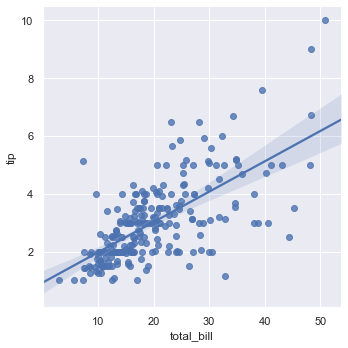

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')
sns.lmplot(x='total_bill', y='tip', data=tips)
plt.savefig('graph/seaborn_lm')

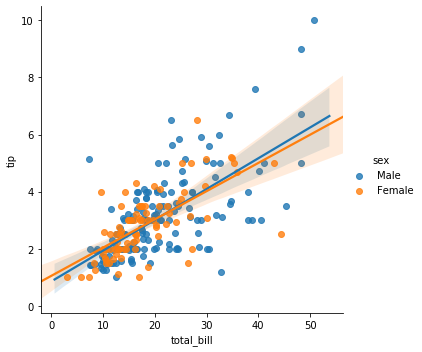

In [2]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex')

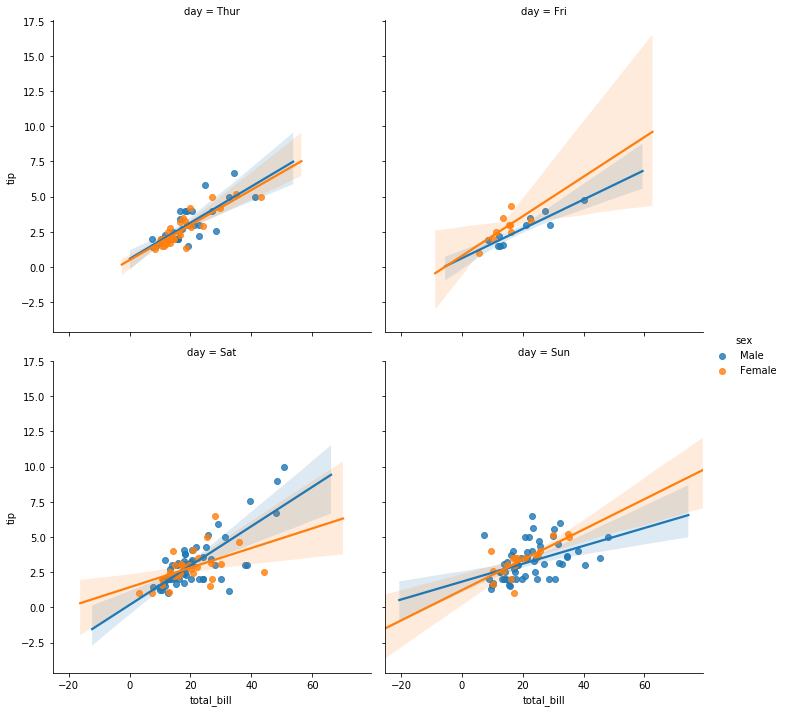

In [14]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', col='day', col_wrap=2)

### residplot()
syntax = `seaborn.residplot(x, y, data, order, robust, dropna, label, color)`

`x` : Data or column name in data for the predictor variable.

`y` : Data or column name in data for the response variable.

`data` : DataFrame to use if x and y are column names.

`order` : Order of the polynomial to fit when calculating the residuals.

`robust` : Fit a robust linear regression when calculating the residuals.

`dropna` : If True, ignore observations with missing data when fitting and plotting.

`label` : Label that will be used in any plot legends.

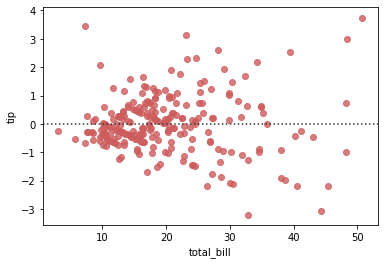

In [7]:
sns.residplot(x='total_bill', y='tip', data=tips, color='indianred')

### other plots for linear regression

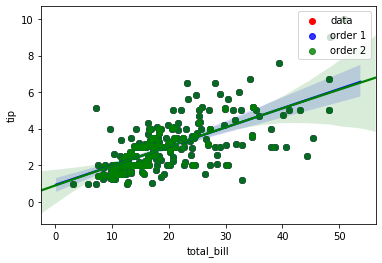

In [22]:
plt.scatter(tips['total_bill'], tips['tip'], label='data', color='red', marker='o')

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x='total_bill', y='tip', data=tips, order=1, color='b', label='order 1')

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='total_bill', y='tip', data=tips, order=2, color='g', label='order 2')


# Add a legend and display the plot
plt.legend(loc='upper right')
plt.show()

## Visualize distribution
### Kernel Density Estimation
syntax=`seaborn.kdeplot(data,data2=None,shade=False,vertical=False,kernel='gau',bw='scott',
gridsize=100,cut=3,clip=None,legend=True,cumulative=False,cbar=False)`

`data`, `data2` : Input data.

`shade` : If True, shade in the area under the KDE curve

`vertical` : If True, density is on x-axis.

`kernel` : {‘gau’ | ‘cos’ | ‘biw’ | ‘epa’ | ‘tri’ | ‘triw’ }. Code for shape of kernel to fit with. Bivariate KDE can only use gaussian kernel.

`bw` : {‘scott’ | ‘silverman’ | scalar | pair of scalars }. Name of reference method to determine kernel size, scalar factor, or scalar for each dimension of the bivariate plot.

`gridsize` : Number of discrete points in the evaluation grid.

`cut` : Draw the estimate to cut * bw from the extreme data points.

`clip` : Lower and upper bounds for datapoints used to fit KDE. Can provide a pair of (low, high) bounds for bivariate plots.

`legend` : If True, add a legend or label the axes when possible.

`cumulative` : If True, draw the cumulative distribution estimated by the kde.

`cbar` : If True and drawing a bivariate KDE plot, add a colorbar.

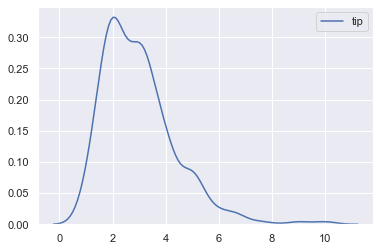

In [71]:
sns.kdeplot(tips['tip'])

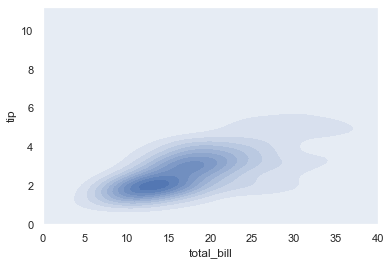

In [75]:
sns.kdeplot(tips['total_bill'], tips['tip'], shade=True, clip=(0, 40))

### Distribution Plot
syntax = `seaborn.distplot(a, bins=None, hist=True, kde=True, fit=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)`

`a` : Observed data.

`bins` : Specification of hist bins, or None to use Freedman-Diaconis rule.

`hist` : Whether to plot a (normed) histogram.

`kde` : Whether to plot a gaussian kernel density estimate.

`fit` : An object with fit method, returning a tuple that can be passed to a pdf method a positional arguments following an grid of values to evaluate the pdf on.

`color` : Color to plot everything but the fitted curve in.

`vertical` : If True, observed values are on y-axis.

`norm_hist` : If True, the histogram height shows a density rather than a count.

`label` : Legend label for the relevent component of the plot

`ax` : if provided, plot on this axis

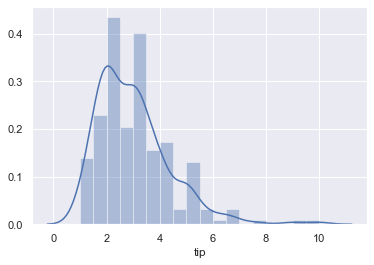

In [85]:
sns.distplot(tips['tip'])
plt.savefig('graph/displot')

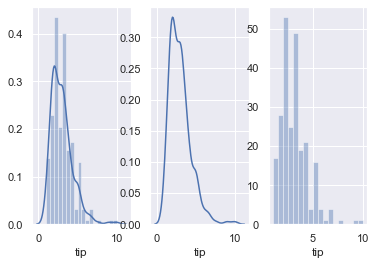

In [80]:
fig, axes = plt.subplots(1,3)
sns.distplot(tips['tip'],ax=axes[0])
sns.distplot(tips['tip'],hist=False,ax=axes[1])
sns.distplot(tips['tip'],kde=False,ax=axes[2])

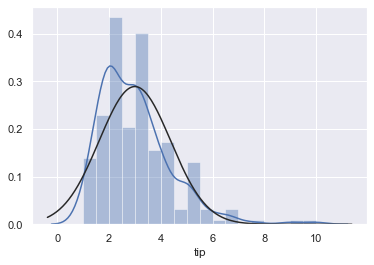

In [83]:
from scipy.stats import *
sns.distplot(tips['tip'], fit=norm)

## Visualize univariate distributions

### Strip Plot
syntax = `seaborn.stripplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, jitter=True, color=None, palette=None, size=5, edgecolor='gray', linewidth=0)`

`x`, `y`, `hue` : Inputs for plotting long-form data.

`data` : Dataset for plotting.

`order`, `hue_order` : Order to plot the categorical levels in, otherwise the levels are inferred from the data objects.

`jitter` : Amount of jitter (only along the categorical axis) to apply.

`orient` : “v” | “h”. Orientation of the plot (vertical or horizontal).

`color` : Color for all of the elements, or seed for a gradient palette.

`palette` : Colors to use for the different levels of the hue variable..

`size` : Diameter of the markers, in points. 

`edgecolor` : Color of the lines around each point.

Text(0, 0.5, 'tips($)')

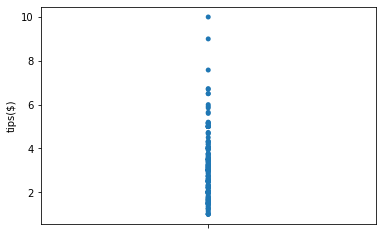

In [29]:
sns.stripplot(y='tip', data=tips, jitter=False)
plt.ylabel('tips($)')

Text(0, 0.5, 'tips($)')

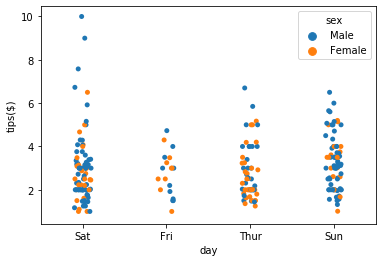

In [36]:
sns.stripplot(x = 'day', y='tip', data=tips, jitter=True, order = ['Sat', 'Fri', 'Thur', 'Sun'], hue='sex')
plt.ylabel('tips($)')

### Swarm Plot
syntax = `seaborn.swarmplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0)`

`x`, `y`, `hue` : Inputs for plotting long-form data.

`data` : Dataset for plotting.

`order`, `hue_order` : Order to plot the categorical levels in, otherwise the levels are inferred from the data objects.

`orient` : “v” | “h”. Orientation of the plot (vertical or horizontal).

`color` : Color for all of the elements, or seed for a gradient palette.

`palette` : Colors to use for the different levels of the hue variable..

`size` : Diameter of the markers, in points. 

`edgecolor` : Color of the lines around each point.

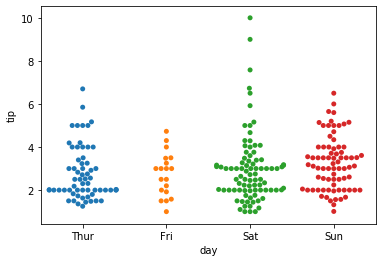

In [43]:
sns.swarmplot(x='day', y='tip', data=tips)

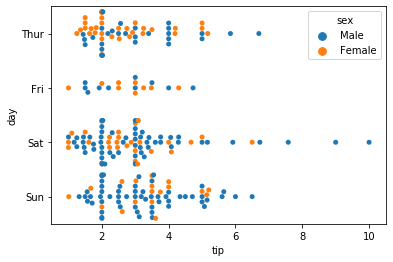

In [44]:
sns.swarmplot(y='day', x='tip', data=tips, hue='sex', orient='h')

### Violin Plot

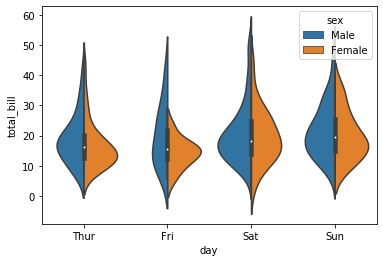

In [68]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True);

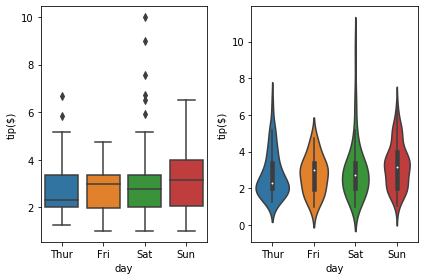

In [46]:
plt.subplot(1,2,1)
sns.boxplot(x='day', y='tip', data=tips)
plt.ylabel('tip($)')
plt.subplot(1,2,2)
sns.violinplot(x='day', y='tip', data=tips)
plt.ylabel('tip($)')

plt.tight_layout()
plt.show()

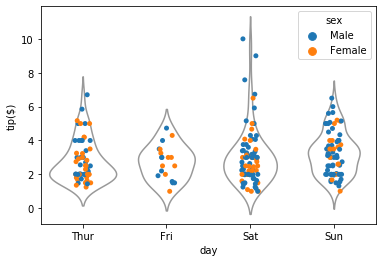

In [51]:
sns.violinplot(x='day', y='tip', data=tips, inner=None, color='white')
sns.stripplot(x = 'day', y='tip', data=tips, jitter=True, hue='sex')
plt.ylabel('tip($)')
plt.show()

## Visualize multivariate distributions

### Joint Plot

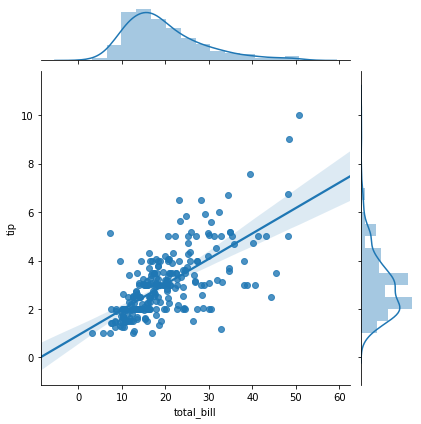

In [58]:
# plot with marginal distribution
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

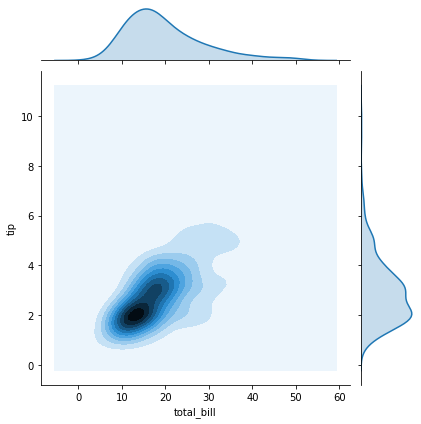

In [59]:
# plot with marginal distribution
sns.jointplot(x="total_bill", y="tip", data=tips, kind="kde")

### Pair Plot

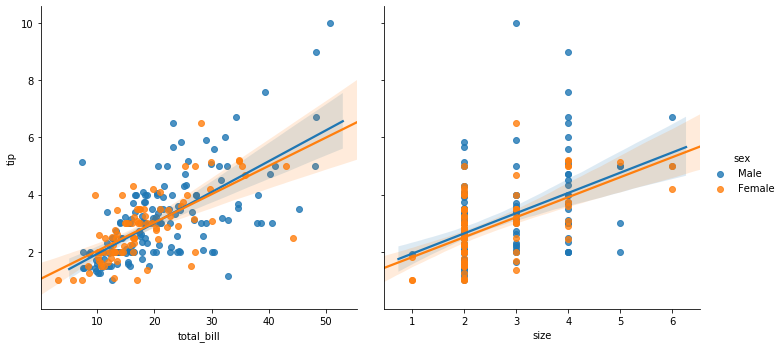

In [54]:
# plot of pair of features of x 
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"], hue="sex", height=5, aspect=1, kind="reg")

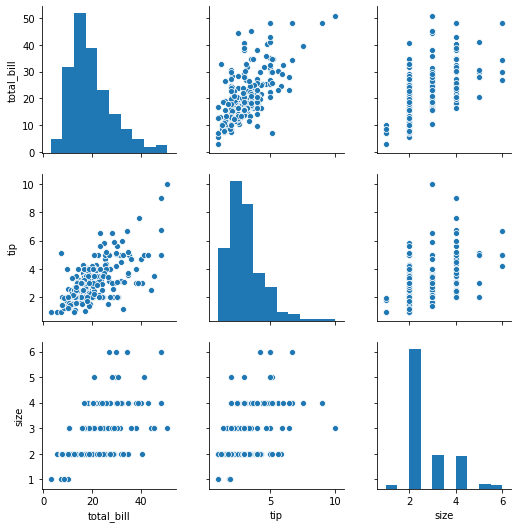

In [62]:
sns.pairplot(tips)

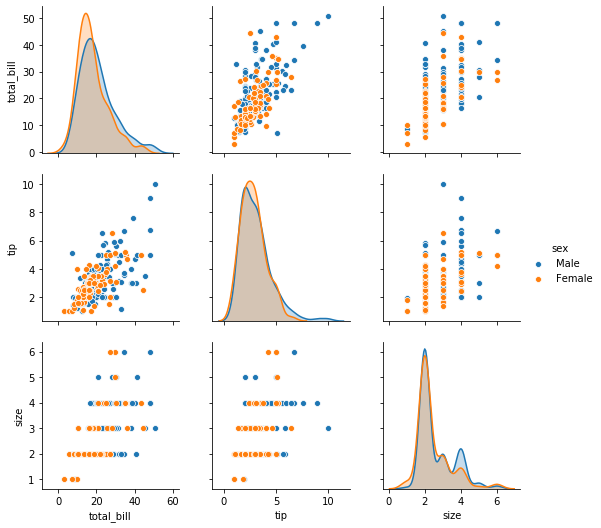

In [63]:
sns.pairplot(tips, hue='sex')

### Heat Map

In [66]:
cov = tips.corr()
cov

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


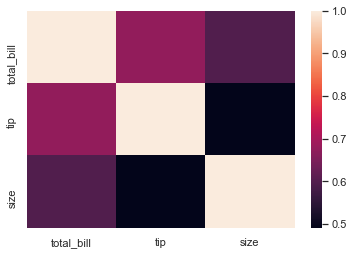

In [86]:
sns.heatmap(covariance)
plt.savefig('graph/corr')
plt.show()